<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Neural-Network-Classifier" data-toc-modified-id="Neural-Network-Classifier-1">Neural Network Classifier</a></span></li><li><span><a href="#Apply-NeuralNetworkClassifier-to-Handwritten-Digits" data-toc-modified-id="Apply-NeuralNetworkClassifier-to-Handwritten-Digits-2">Apply <code>NeuralNetworkClassifier</code> to Handwritten Digits</a></span></li><li><span><a href="#Experiments" data-toc-modified-id="Experiments-3">Experiments</a></span></li><li><span><a href="#Grading" data-toc-modified-id="Grading-4">Grading</a></span></li><li><span><a href="#Extra-Credit" data-toc-modified-id="Extra-Credit-5">Extra Credit</a></span></li></ul></div>

# Neural Network Classifier

You may start with your `NeuralNetwork` class from A2, or start with the [implementation defined here](https://www.cs.colostate.edu/~anderson/cs545/notebooks/A2solution.tar) in which all functions meant be called by other functions in this class start with an underscore character. Implement the subclass `NeuralNetworkClassifier` that extends `NeuralNetwork` as discussed in class.  Your `NeuralNetworkClassifier` implementation should rely on inheriting functions from `NeuralNetwork` as much as possible. 

Your `neuralnetworks.py` file (notice it is plural) will now contain two classes, `NeuralNetwork` and `NeuralNetworkClassifier`.

In `NeuralNetworkClassifier` replace the `error_f` function with one called `_neg_log_likelihood_f` and pass it instead of `error_f` into the optimization functions.

Here are some example tests.

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np
import neuralnetworks as nn
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
X = np.array([[0, 0], [1, 0], [0, 1], [1, 1]])
T = np.array([[0], [1], [1], [0]])
X, T

(array([[0, 0],
        [1, 0],
        [0, 1],
        [1, 1]]),
 array([[0],
        [1],
        [1],
        [0]]))

In [5]:
np.random.seed(111)
nnet = nn.NeuralNetworkClassifier(2, [10], 2)

In [6]:
print(nnet)

NeuralNetwork(2, [10], 2)


In [7]:
nnet.Ws

[array([[0.35343662, 0.09761247, 0.25175879, 0.4441339 , 0.17050614,
         0.08611927, 0.01297787, 0.24261672, 0.1378032 , 0.19494589],
        [0.57198811, 0.13725143, 0.0468766 , 0.38659388, 0.35867477,
         0.15834035, 0.26917306, 0.06833965, 0.04269942, 0.52006221],
        [0.4583945 , 0.48530311, 0.47066025, 0.57212805, 0.3332892 ,
         0.46982855, 0.24324799, 0.01584709, 0.26219591, 0.06081004]]),
 array([[0.24640112, 0.21037283],
        [0.17043996, 0.08268264],
        [0.30105116, 0.04162125],
        [0.18555481, 0.14624395],
        [0.12212025, 0.21945476],
        [0.09733206, 0.12076903],
        [0.09617199, 0.28559813],
        [0.27700099, 0.24538331],
        [0.01027463, 0.28443762],
        [0.28656819, 0.24319635],
        [0.14511079, 0.29148887]])]

The `softmax` function can produce errors if the denominator is close to zero.  Here is an implentation you may use to avoid some of those errors.  This assumes you have the following import in your `neuralnetworks.py` file.

`sys.float_info.epsilon` is also useful in your `_neg_log_likehood_f` function to avoid taking the `log` of zero.

In [8]:
import sys  # for sys.float_info.epsilon 

In [9]:
    def _softmax(self, Y):
        '''Apply to final layer weighted sum outputs'''
        # Trick to avoid overflow
        maxY = Y.max()       
        expY = np.exp(Y - maxY)
        denom = expY.sum(1).reshape((-1, 1))
        Y = expY / (denom + sys.float_info.epsilon)
        return Y

Replace the `error_f` function with `neg_log_likelihood`.  If you add some print statements in `_neg_log_likelihood` functions, you can compare your output to the following results.

In [10]:
nnet.train(X, T, n_epochs=1, method='sgd', learning_rate=0.01)

sgd: Epoch 1 ObjectiveF=0.70718


NeuralNetwork(2, [10], 2)

In [11]:
print(nnet)

NeuralNetwork(2, [10], 2)
 Trained for 1 epochs.
 Final standardized training error 0.7072.


Now if you comment out those print statements, you can run for more epochs without tons of output.

In [12]:
np.random.seed(111)
nnet = nn.NeuralNetworkClassifier(2, [10], 2)

In [13]:
nnet.train(X, T, 100, method='scg')

SCG: Epoch 10 ObjectiveF=0.99632
SCG: Epoch 20 ObjectiveF=0.99996
SCG: Epoch 30 ObjectiveF=1.00000


NeuralNetwork(2, [10], 2)

The `use()` function returns two `numpy` arrays. The first one are the class predictions for eachs sample, containing values from the set of unique values in `T` passed into the `train()` function.

The second value are the probabilities of each class for each sample. This should a column for each unique value in `T`.

In [14]:
nnet.use(X)

(array([[0],
        [1],
        [1],
        [0]], dtype=int64),
 array([[9.99999991e-01, 9.37779879e-09],
        [1.13195366e-08, 9.99999989e-01],
        [8.63074555e-09, 9.99999991e-01],
        [9.99999990e-01, 9.87445336e-09]]))

In [15]:
def percent_correct(Y, T):
    return np.mean(T == Y) * 100

In [16]:
percent_correct(nnet.use(X)[0], T)

100.0

Works!  The XOR problem was used early in the history of neural networks as a problem that cannot be solved with a linear model.  Let's try it.  It turns out our neural network code can do this if we use an empty list for the hidden unit structure!

In [17]:
nnet = nn.NeuralNetworkClassifier(2, [], 2)
nnet.train(X, T, 100, method='scg')

NeuralNetwork(2, [], 2)

In [18]:
nnet.use(X)

(array([[0],
        [1],
        [0],
        [1]], dtype=int64),
 array([[0.5, 0.5],
        [0.5, 0.5],
        [0.5, 0.5],
        [0.5, 0.5]]))

In [19]:
percent_correct(nnet.use(X)[0], T)

50.0

A second way to evaluate a classifier is to calculate a confusion matrix. This shows the percent accuracy for each class, and also shows which classes are predicted in error.

Here is a function you can use to show a confusion matrix.

In [20]:
import pandas

def confusion_matrix(Y_classes, T):
    class_names = np.unique(T)
    table = []
    for true_class in class_names:
        row = []
        for Y_class in class_names:
            row.append(100 * np.mean(Y_classes[T == true_class] == Y_class))
        table.append(row)
    conf_matrix = pandas.DataFrame(table, index=class_names, columns=class_names)
    # cf.style.background_gradient(cmap='Blues').format("{:.1f} %")
    print('Percent Correct')
    return conf_matrix.style.background_gradient(cmap='Blues').format("{:.1f}")

In [21]:
confusion_matrix(nnet.use(X)[0], T)

Percent Correct


,0,1
0,50.0,50.0
1,50.0,50.0


# Apply `NeuralNetworkClassifier` to Handwritten Digits

Apply your `NeuralNetworkClassifier` to the [MNIST digits dataset](https://www.cs.colostate.edu/~anderson/cs545/notebooks/mnist.pkl.gz).

In [22]:
import pickle
import gzip

In [23]:
with gzip.open('mnist.pkl.gz', 'rb') as f:
    train_set, valid_set, test_set = pickle.load(f, encoding='latin1')

Xtrain = train_set[0]
Ttrain = train_set[1].reshape(-1, 1)

Xval = valid_set[0]
Tval = valid_set[1].reshape(-1, 1)

Xtest = test_set[0]
Ttest = test_set[1].reshape(-1, 1)

print(Xtrain.shape, Ttrain.shape,  Xval.shape, Tval.shape,  Xtest.shape, Ttest.shape)

(50000, 784) (50000, 1) (10000, 784) (10000, 1) (10000, 784) (10000, 1)


In [24]:
28*28

784

In [25]:
def draw_image(image, label):
    plt.imshow(-image.reshape(28, 28), cmap='gray')
    plt.xticks([])
    plt.yticks([])
    plt.axis('off')
    plt.title(label)

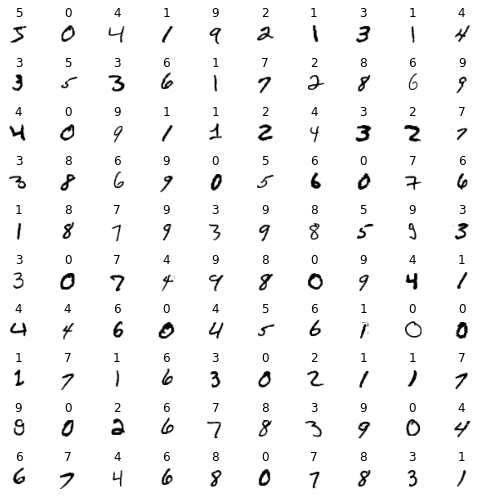

In [26]:
plt.figure(figsize=(7, 7))
for i in range(100):
    plt.subplot(10, 10, i+1)
    draw_image(Xtrain[i], Ttrain[i,0])
plt.tight_layout()

In [27]:
nnet = nn.NeuralNetworkClassifier(784, [], 10)
nnet.train(Xtrain, Ttrain, n_epochs=40, method='scg')

SCG: Epoch 4 ObjectiveF=0.95819
SCG: Epoch 8 ObjectiveF=0.96994
SCG: Epoch 12 ObjectiveF=0.97146
SCG: Epoch 16 ObjectiveF=0.97146
SCG: Epoch 20 ObjectiveF=0.97146
SCG: Epoch 24 ObjectiveF=0.97273
SCG: Epoch 28 ObjectiveF=0.97421
SCG: Epoch 32 ObjectiveF=0.97475
SCG: Epoch 36 ObjectiveF=0.97494
SCG: Epoch 40 ObjectiveF=0.97496


NeuralNetwork(784, [], 10)

In [28]:
print(nnet)

NeuralNetwork(784, [], 10)
 Trained for 40 epochs.
 Final standardized training error 0.975.


In [29]:
[percent_correct(nnet.use(X)[0], T) for X, T in zip([Xtrain, Xval, Xtest], [Ttrain, Tval, Ttest])]

[93.138, 92.69, 92.34]

In [30]:
nnet = nn.NeuralNetworkClassifier(784, [20], 10)
nnet.train(Xtrain, Ttrain, n_epochs=40, method='scg')

SCG: Epoch 4 ObjectiveF=0.88560
SCG: Epoch 8 ObjectiveF=0.95820
SCG: Epoch 12 ObjectiveF=0.97325
SCG: Epoch 16 ObjectiveF=0.97961
SCG: Epoch 20 ObjectiveF=0.98322
SCG: Epoch 24 ObjectiveF=0.98575
SCG: Epoch 28 ObjectiveF=0.98762
SCG: Epoch 32 ObjectiveF=0.98896
SCG: Epoch 36 ObjectiveF=0.98981
SCG: Epoch 40 ObjectiveF=0.99067


NeuralNetwork(784, [20], 10)

In [30]:
[percent_correct(nnet.use(X)[0], T) for X, T in zip([Xtrain, Xval, Xtest],
                                                    [Ttrain, Tval, Ttest])]

[97.47200000000001, 94.24, 93.55]

# Experiments

For each method, try various hidden layer structures, learning rates, and numbers of epochs.  Use the validation percent accuracy to pick the best hidden layers, learning rates and numbers of epochs for each method (ignore learning rates for scg).  Report training, validation and test accuracy for your best validation results for each of the three methods.

Include plots of data likelihood versus epochs, and confusion matrices, for best results for each method.

Write at least 10 sentences about what you observe in the likelihood plots, the train, validation and test accuracies, and the confusion matrices.

In [31]:
Xtrain.shape, Ttrain.shape, Xval.shape, Tval.shape, Xtest.shape, Ttest.shape ## no need for partioning data here from lecture 9

((50000, 784), (50000, 1), (10000, 784), (10000, 1), (10000, 784), (10000, 1))

##For SCG

sgd: Epoch 5 ObjectiveF=0.79635
sgd: Epoch 10 ObjectiveF=0.81252
sgd: Epoch 15 ObjectiveF=0.83240
sgd: Epoch 20 ObjectiveF=0.85155
sgd: Epoch 25 ObjectiveF=0.86782
sgd: Epoch 30 ObjectiveF=0.88085
sgd: Epoch 35 ObjectiveF=0.89107
sgd: Epoch 40 ObjectiveF=0.89910
sgd: Epoch 45 ObjectiveF=0.90550
sgd: Epoch 50 ObjectiveF=0.91068


[78.294, 80.42, 79.93]

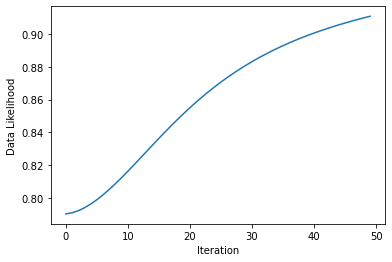

In [34]:
nnet = nn.NeuralNetworkClassifier(Xtrain.shape[1], [],  len(np.unique(Ttrain))) #from lecture 9
nnet.train(Xtrain, Ttrain, n_epochs=50, learning_rate=0.01, method='sgd')
plt.figure()
plt.plot(nnet.get_error_trace())
plt.xlabel('Iteration');
plt.ylabel('Data Likelihood');
[percent_correct(nnet.use(X)[0], T) for X, T in zip([Xtrain, Xval, Xtest], [Ttrain, Tval, Ttest])]

sgd: Epoch 10 ObjectiveF=0.81352
sgd: Epoch 20 ObjectiveF=0.85218
sgd: Epoch 30 ObjectiveF=0.88123
sgd: Epoch 40 ObjectiveF=0.89937
sgd: Epoch 50 ObjectiveF=0.91089
sgd: Epoch 60 ObjectiveF=0.91876
sgd: Epoch 70 ObjectiveF=0.92448
sgd: Epoch 80 ObjectiveF=0.92887
sgd: Epoch 90 ObjectiveF=0.93236
sgd: Epoch 100 ObjectiveF=0.93522


[84.004, 85.42, 85.11]

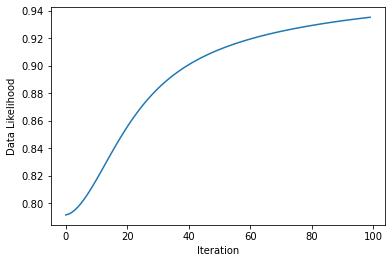

In [36]:
nnet = nn.NeuralNetworkClassifier(Xtrain.shape[1], [],  len(np.unique(Ttrain))) #from lecture 9
nnet.train(Xtrain, Ttrain, n_epochs=100, learning_rate=0.01, method='sgd')
plt.figure()
plt.plot(nnet.get_error_trace())
plt.xlabel('Iteration');
plt.ylabel('Data Likelihood');
[percent_correct(nnet.use(X)[0], T) for X, T in zip([Xtrain, Xval, Xtest], [Ttrain, Tval, Ttest])]

sgd: Epoch 10 ObjectiveF=0.90586
sgd: Epoch 20 ObjectiveF=0.94382
sgd: Epoch 30 ObjectiveF=0.95456
sgd: Epoch 40 ObjectiveF=0.95848
sgd: Epoch 50 ObjectiveF=0.96071
sgd: Epoch 60 ObjectiveF=0.96225
sgd: Epoch 70 ObjectiveF=0.96335
sgd: Epoch 80 ObjectiveF=0.96420
sgd: Epoch 90 ObjectiveF=0.96490
sgd: Epoch 100 ObjectiveF=0.96549


[90.03, 91.03, 90.38000000000001]

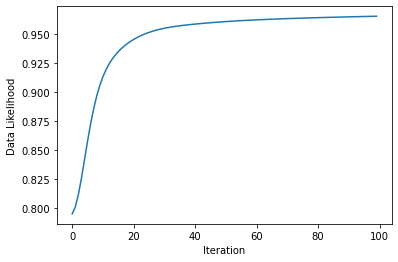

In [39]:
nnet = nn.NeuralNetworkClassifier(Xtrain.shape[1], [],  len(np.unique(Ttrain))) #from lecture 9
nnet.train(Xtrain, Ttrain, n_epochs=100, learning_rate=0.09, method='sgd')
plt.figure()
plt.plot(nnet.get_error_trace())
plt.xlabel('Iteration');
plt.ylabel('Data Likelihood');
[percent_correct(nnet.use(X)[0], T) for X, T in zip([Xtrain, Xval, Xtest], [Ttrain, Tval, Ttest])]

In [40]:
confusion_matrix(nnet.use(Xval)[0], Tval)

Percent Correct


,0,1,2,3,4,5,6,7,8,9
0,96.2,0.0,0.3,0.4,0.3,0.6,1.2,0.4,0.5,0.1
1,0.0,97.2,0.3,0.4,0.1,0.5,0.3,0.2,1.1,0.0
2,0.8,1.6,87.8,1.6,2.2,0.2,1.3,1.8,2.1,0.5
3,0.3,0.9,1.7,87.8,0.1,4.3,0.7,0.3,2.9,1.2
4,0.1,1.3,0.1,0.1,94.7,0.1,0.5,0.2,0.2,2.6
5,1.4,1.3,1.0,4.0,1.1,84.0,2.8,0.8,2.5,1.0
6,0.4,0.7,0.6,0.0,0.6,0.3,96.4,0.0,0.9,0.0
7,0.7,1.7,0.9,0.7,0.7,0.0,0.0,92.6,0.0,2.6
8,0.6,5.0,1.3,2.5,0.7,2.0,0.5,1.4,84.0,2.1
9,0.6,1.0,0.4,1.4,3.2,0.4,0.1,3.5,0.4,88.9


In [41]:
confusion_matrix(nnet.use(Xtest)[0], Ttest)

Percent Correct


,0,1,2,3,4,5,6,7,8,9
0,97.6,0.0,0.1,0.1,0.0,0.9,1.0,0.1,0.2,0.0
1,0.0,97.4,0.3,0.2,0.1,0.3,0.4,0.0,1.4,0.0
2,1.4,1.3,86.9,1.8,1.5,0.2,1.0,2.1,3.4,0.5
3,0.5,0.5,2.1,88.6,0.0,3.7,0.5,1.7,1.8,0.7
4,0.1,0.7,0.4,0.0,93.5,0.2,1.2,0.2,0.3,3.4
5,1.3,0.6,0.6,4.5,1.6,84.1,2.4,1.6,2.7,0.8
6,1.5,0.7,0.9,0.0,1.4,1.8,93.2,0.1,0.4,0.0
7,0.1,2.0,2.2,0.4,1.1,0.1,0.1,90.4,0.0,3.6
8,1.0,2.1,0.9,2.7,2.0,3.3,1.2,1.7,83.2,2.0
9,1.7,0.8,0.3,1.3,4.8,0.6,0.0,2.6,0.4,87.6


In [42]:
confusion_matrix(nnet.use(Xtrain)[0], Ttrain)

Percent Correct


,0,1,2,3,4,5,6,7,8,9
0,96.0,0.1,0.4,0.2,0.3,1.0,0.9,0.3,0.7,0.1
1,0.0,96.9,0.5,0.3,0.1,0.5,0.1,0.2,1.3,0.1
2,1.1,1.6,86.6,1.6,1.9,0.3,1.9,2.0,2.6,0.4
3,0.6,1.1,2.4,86.6,0.2,3.8,0.5,1.7,2.0,1.2
4,0.2,0.8,0.7,0.1,92.1,0.2,1.0,0.3,0.6,4.0
5,1.7,1.5,0.5,3.0,1.5,85.0,2.1,0.7,2.8,1.2
6,0.9,0.7,0.8,0.0,0.8,1.5,94.4,0.1,0.7,0.0
7,0.4,1.7,1.1,0.4,1.4,0.2,0.0,91.2,0.1,3.6
8,1.0,4.4,1.3,3.2,1.1,3.0,0.8,0.5,82.3,2.3
9,0.7,0.7,0.4,1.5,3.7,0.6,0.0,4.0,0.6,87.6


##For ADAM

Adam: Epoch 10 ObjectiveF=0.93532
Adam: Epoch 20 ObjectiveF=0.96368
Adam: Epoch 30 ObjectiveF=0.97407
Adam: Epoch 40 ObjectiveF=0.97970
Adam: Epoch 50 ObjectiveF=0.98307
Adam: Epoch 60 ObjectiveF=0.98518
Adam: Epoch 70 ObjectiveF=0.98669
Adam: Epoch 80 ObjectiveF=0.98780
Adam: Epoch 90 ObjectiveF=0.98869
Adam: Epoch 100 ObjectiveF=0.98936


[97.16, 92.77, 92.30000000000001]

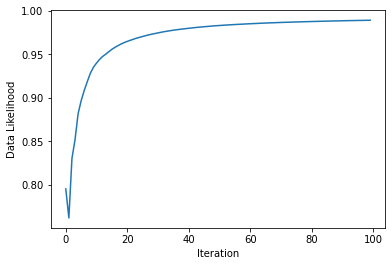

In [44]:
nnet = nn.NeuralNetworkClassifier(Xtrain.shape[1], [50,25],  len(np.unique(Ttrain))) #from lecture 9
nnet.train(Xtrain, Ttrain, n_epochs=100, learning_rate=0.09, method='adam')
plt.figure()
plt.plot(nnet.get_error_trace())
plt.xlabel('Iteration');
plt.ylabel('Data Likelihood');
[percent_correct(nnet.use(X)[0], T) for X, T in zip([Xtrain, Xval, Xtest], [Ttrain, Tval, Ttest])]

Adam: Epoch 7 ObjectiveF=0.90048
Adam: Epoch 14 ObjectiveF=0.94711
Adam: Epoch 21 ObjectiveF=0.96089
Adam: Epoch 28 ObjectiveF=0.96915
Adam: Epoch 35 ObjectiveF=0.97439
Adam: Epoch 42 ObjectiveF=0.97796
Adam: Epoch 49 ObjectiveF=0.98041
Adam: Epoch 56 ObjectiveF=0.98228
Adam: Epoch 63 ObjectiveF=0.98371
Adam: Epoch 70 ObjectiveF=0.98481


[96.10600000000001, 92.65, 91.55]

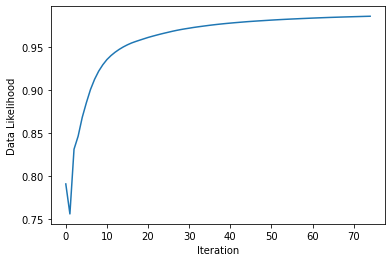

In [46]:
nnet = nn.NeuralNetworkClassifier(Xtrain.shape[1], [50,25],  len(np.unique(Ttrain))) #from lecture 9
nnet.train(Xtrain, Ttrain, n_epochs=75, learning_rate=0.09, method='adam')
plt.figure()
plt.plot(nnet.get_error_trace())
plt.xlabel('Iteration');
plt.ylabel('Data Likelihood');
[percent_correct(nnet.use(X)[0], T) for X, T in zip([Xtrain, Xval, Xtest], [Ttrain, Tval, Ttest])]

Adam: Epoch 7 ObjectiveF=0.91448
Adam: Epoch 14 ObjectiveF=0.95540
Adam: Epoch 21 ObjectiveF=0.96800
Adam: Epoch 28 ObjectiveF=0.97446
Adam: Epoch 35 ObjectiveF=0.97866
Adam: Epoch 42 ObjectiveF=0.98141
Adam: Epoch 49 ObjectiveF=0.98340
Adam: Epoch 56 ObjectiveF=0.98485
Adam: Epoch 63 ObjectiveF=0.98603
Adam: Epoch 70 ObjectiveF=0.98698


[96.738, 93.0, 92.23]

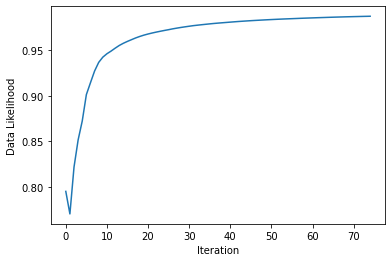

In [47]:
nnet = nn.NeuralNetworkClassifier(Xtrain.shape[1], [50,25],  len(np.unique(Ttrain))) #from lecture 9
nnet.train(Xtrain, Ttrain, n_epochs=75, learning_rate=0.1, method='adam')
plt.figure()
plt.plot(nnet.get_error_trace())
plt.xlabel('Iteration');
plt.ylabel('Data Likelihood');
[percent_correct(nnet.use(X)[0], T) for X, T in zip([Xtrain, Xval, Xtest], [Ttrain, Tval, Ttest])]

In [48]:
confusion_matrix(nnet.use(Xval)[0], Tval)

Percent Correct


,0,1,2,3,4,5,6,7,8,9
0,96.3,0.0,0.6,0.3,0.2,0.6,1.2,0.0,0.5,0.3
1,0.0,96.7,0.4,0.3,0.2,0.3,0.5,0.2,1.4,0.1
2,0.6,0.4,93.8,1.3,0.3,0.2,1.2,0.6,1.1,0.4
3,0.6,0.5,1.5,89.3,0.1,3.6,0.2,0.6,3.0,0.7
4,0.2,0.7,1.1,0.1,93.6,0.3,0.3,0.6,0.3,2.7
5,0.8,0.1,1.1,4.0,0.3,88.6,2.0,0.2,2.2,0.7
6,0.7,0.2,0.5,0.0,0.8,0.5,96.6,0.0,0.6,0.0
7,0.4,0.6,1.0,0.6,0.4,0.1,0.0,94.7,0.3,1.9
8,0.5,1.3,0.7,2.3,0.4,2.5,0.8,0.6,89.7,1.3
9,0.5,0.1,0.2,0.9,3.5,0.2,0.2,2.9,1.2,90.1


In [49]:
confusion_matrix(nnet.use(Xtest)[0], Ttest)

Percent Correct


,0,1,2,3,4,5,6,7,8,9
0,96.8,0.0,0.0,0.3,0.5,0.8,1.3,0.2,0.0,0.0
1,0.0,97.9,0.6,0.3,0.0,0.0,0.3,0.3,0.7,0.0
2,1.3,0.2,92.1,2.1,0.6,0.2,1.3,0.6,1.6,0.1
3,0.2,0.5,1.7,90.6,0.1,2.3,0.2,1.6,2.1,0.8
4,0.3,0.3,1.1,0.1,94.0,0.0,1.0,0.4,0.3,2.4
5,1.1,0.1,0.7,4.0,0.4,88.1,1.2,0.7,2.7,0.9
6,1.4,0.1,0.6,0.1,1.4,1.4,94.4,0.0,0.6,0.1
7,0.2,1.0,1.7,1.3,0.6,0.1,0.1,92.0,0.3,2.8
8,0.9,0.9,1.5,3.2,0.6,3.3,1.2,1.0,86.1,1.1
9,0.8,0.6,0.3,1.1,3.7,0.4,0.0,3.3,0.7,89.2


In [50]:
confusion_matrix(nnet.use(Xtrain)[0], Ttrain)

Percent Correct


,0,1,2,3,4,5,6,7,8,9
0,98.6,0.0,0.2,0.1,0.2,0.1,0.2,0.0,0.4,0.1
1,0.0,97.7,0.6,0.4,0.2,0.2,0.1,0.3,0.5,0.1
2,0.5,0.1,96.6,0.7,0.4,0.1,0.4,0.4,0.7,0.0
3,0.1,0.4,1.2,95.4,0.0,1.1,0.1,0.6,0.9,0.3
4,0.1,0.1,0.3,0.0,97.4,0.1,0.5,0.2,0.1,1.1
5,0.5,0.2,0.2,1.2,0.2,95.7,0.6,0.2,0.9,0.3
6,0.2,0.1,0.2,0.0,0.6,0.6,98.0,0.0,0.2,0.0
7,0.1,0.2,0.4,0.3,0.6,0.1,0.0,97.1,0.1,1.0
8,0.2,0.7,0.5,1.0,0.2,1.3,0.7,0.0,94.9,0.4
9,0.3,0.0,0.1,0.4,1.8,0.1,0.0,1.1,0.4,95.7


##FOR SGD

SCG: Epoch 8 ObjectiveF=0.81840
SCG: Epoch 16 ObjectiveF=0.85004
SCG: Epoch 24 ObjectiveF=0.92531
SCG: Epoch 32 ObjectiveF=0.96668
SCG: Epoch 40 ObjectiveF=0.98033
SCG: Epoch 48 ObjectiveF=0.98808
SCG: Epoch 56 ObjectiveF=0.99326
SCG: Epoch 64 ObjectiveF=0.99644
SCG: Epoch 72 ObjectiveF=0.99794


[99.722, 95.35, 94.69]

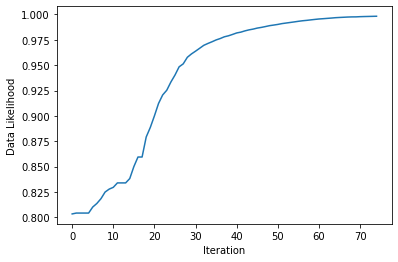

In [52]:
nnet = nn.NeuralNetworkClassifier(Xtrain.shape[1], [50,25],  len(np.unique(Ttrain))) #from lecture 9
nnet.train(Xtrain, Ttrain, n_epochs=75, method='scg')
plt.figure()
plt.plot(nnet.get_error_trace())
plt.xlabel('Iteration');
plt.ylabel('Data Likelihood');
[percent_correct(nnet.use(X)[0], T) for X, T in zip([Xtrain, Xval, Xtest], [Ttrain, Tval, Ttest])]

SCG: Epoch 10 ObjectiveF=0.82848
SCG: Epoch 20 ObjectiveF=0.89521
SCG: Epoch 30 ObjectiveF=0.97136
SCG: Epoch 40 ObjectiveF=0.98653
SCG: Epoch 50 ObjectiveF=0.99425
SCG: Epoch 60 ObjectiveF=0.99778
SCG: Epoch 70 ObjectiveF=0.99907
SCG: Epoch 80 ObjectiveF=0.99963
SCG: Epoch 90 ObjectiveF=0.99984
SCG: Epoch 100 ObjectiveF=0.99994


[100.0, 95.34, 95.08]

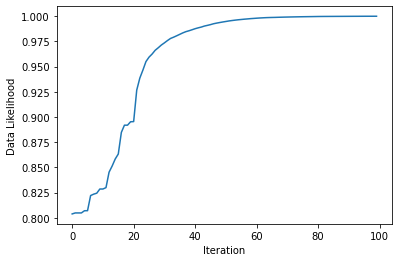

In [54]:
nnet = nn.NeuralNetworkClassifier(Xtrain.shape[1], [50,25],  len(np.unique(Ttrain))) #from lecture 9
nnet.train(Xtrain, Ttrain, n_epochs=100, method='scg')
plt.figure()
plt.plot(nnet.get_error_trace())
plt.xlabel('Iteration');
plt.ylabel('Data Likelihood');
[percent_correct(nnet.use(X)[0], T) for X, T in zip([Xtrain, Xval, Xtest], [Ttrain, Tval, Ttest])]

In [55]:
confusion_matrix(nnet.use(Xval)[0], Tval)

Percent Correct


,0,1,2,3,4,5,6,7,8,9
0,97.7,0.0,0.6,0.0,0.2,0.3,0.4,0.1,0.3,0.4
1,0.0,98.3,0.3,0.4,0.1,0.0,0.1,0.1,0.8,0.0
2,0.7,0.4,94.5,1.6,0.5,0.0,0.3,0.9,0.7,0.3
3,0.4,0.1,0.9,95.0,0.0,1.5,0.2,0.3,1.3,0.5
4,0.0,0.5,0.9,0.0,95.4,0.3,0.4,0.3,0.2,1.9
5,0.3,0.0,0.3,2.8,0.2,92.2,1.1,0.9,1.6,0.4
6,0.5,0.1,0.7,0.0,0.4,0.6,97.2,0.0,0.4,0.0
7,0.2,0.4,0.6,1.0,0.3,0.2,0.0,95.9,0.1,1.5
8,0.5,0.5,1.5,1.1,0.2,1.2,0.5,0.3,93.1,1.2
9,0.2,0.1,0.2,1.0,2.0,0.6,0.0,1.2,0.9,93.7


In [56]:
confusion_matrix(nnet.use(Xtest)[0], Ttest)

Percent Correct


,0,1,2,3,4,5,6,7,8,9
0,97.0,0.0,0.3,0.3,0.0,0.6,0.9,0.2,0.4,0.2
1,0.0,98.9,0.4,0.3,0.1,0.2,0.2,0.1,0.0,0.0
2,0.7,0.3,93.7,1.7,0.8,0.0,0.9,0.8,0.9,0.3
3,0.1,0.1,1.5,93.9,0.1,1.4,0.0,0.8,1.4,0.8
4,0.0,0.1,0.5,0.6,95.9,0.2,0.7,0.4,0.2,1.3
5,0.7,0.1,0.1,1.9,0.2,93.3,0.6,0.3,2.1,0.7
6,0.4,0.2,0.1,0.0,0.7,1.1,97.1,0.1,0.2,0.0
7,0.1,0.4,1.1,1.2,0.2,0.0,0.0,95.2,0.2,1.7
8,0.3,0.1,1.1,2.3,0.6,1.8,0.3,0.6,92.1,0.7
9,0.3,0.3,0.3,1.0,1.8,0.6,0.1,1.5,1.0,93.2


In [57]:
confusion_matrix(nnet.use(Xtrain)[0], Ttrain)

Percent Correct


,0,1,2,3,4,5,6,7,8,9
0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,100.0


##DIscussion

1.Increasing the number of layers in the network increases the accuracy, but it does a saturation point beyond which it does increase accuracy any further
2.Decreasing the number of epochs reduces percent accuracy, increasing the number of epochs increases the percent accuracy but increases computational load and consequently time taken for the results.
3.Increasing the learning rate increases percent accuracy and but reducing causes the optimizer to hunt for the best value.
4.SGD performs better with no hidden layers in our case.
5.Increasing number of epochs beyond a certain value does not contribute significantly and the optimizer keeps on searching for a better value and the accuracy hence does increase beyond certain point.
6.A two layer network gives a better value for Adam.
7.If the data is over-fitting reducing the number of epochs reduces computational load without any significant reduction in accuracy.
8.Increasing learning rate further does significantly increase accuracy but reducing learning rate does affect lower the accuracy significacntly and increases the computational load.
9.A two layer network gives much better results with SCG.
10.Unlike SGD and Adam, SCG has a much higher step value between epochs that is it reduces error faster and approaches zero before the computation of total number of epochs in some cases but we do not want overfitting, which reduces are 
percent accuracy.
11.Since we are achieving near perfect accuracy we can reduce the number of epochs and reduce computational complexity without any significant decrease in accuracy.

# Grading

Download [A3grader.tar](https://www.cs.colostate.edu/~anderson/cs545/notebooks/A3grader.tar), extract `A3grader.py` before running the following cell.

In [31]:
%run -i A3grader.py


======================= Code Execution =======================

Extracting python code from notebook named 'Shetty-A3.ipynb' and storing in notebookcode.py
Removing all statements that are not function or class defs or import statements.

## Testing inheritance ####################################################################

    correct = issubclass(NeuralNetworkClassifier, NeuralNetwork)


--- 10/10 points. NeuralNetworkClassifier correctly extends NeuralNetwork.

## Testing inheritance ####################################################################

    import inspect
    forward_func = [f for f in inspect.classify_class_attrs(NeuralNetworkClassifier) if (f.name == 'forward' or f.name == '_forward')]
    correct = forward_func[0].defining_class == NeuralNetwork


--- 5/5 points. NeuralNetworkClassifier forward function correctly inherited from NeuralNetwork.

## Testing inheritance ####################################################################

    import inspect
   

<Figure size 432x288 with 0 Axes>

# Extra Credit

Repeat the above experiments with a different data set.  Randonly partition your data into training, validaton and test parts if not already provided.  Write in markdown cells descriptions of the data and your results.